In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time

In [5]:
# path = r"D:\study\moed2\2lab\c12-85v.xgs"
path = r"D:\study\moed2\2lab\u0.xgs"
# xlen, ylen = 1024, 1024
xlen, ylen = 2048, 2500

In [6]:
dtype = np.dtype('float')
arr = np.fromfile(path, dtype=dtype, sep='')
ln_all = len(arr)
ln_need = xlen*ylen

In [7]:
arr=arr[ln_all-ln_need:]
new_arr = np.reshape(arr, (xlen, ylen))
img = np.array(new_arr, dtype='float')

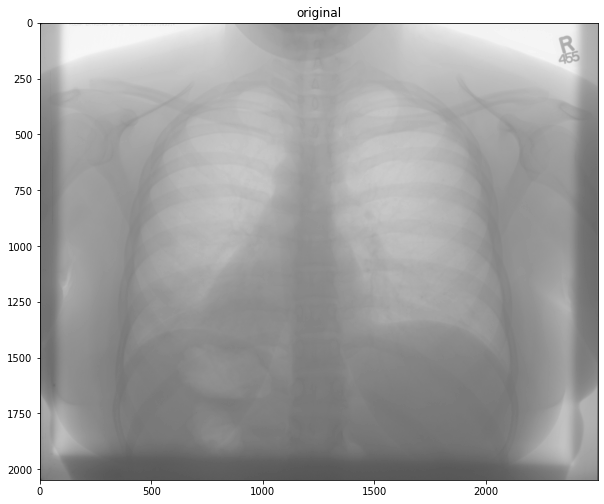

In [9]:
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(img, cmap='gray')

In [2]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [16]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

In [5]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = ((image-mn)/amp)
    return img_restore_shift


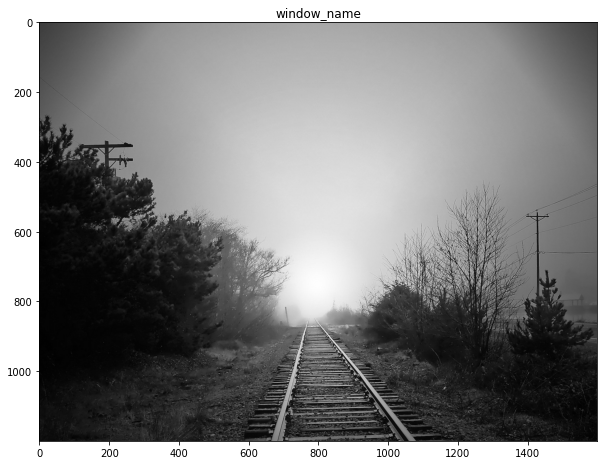

In [13]:
show_picture_plot(img)

In [6]:
def inverse_image(image):
    # try:
        new_image = []
        if len(image.shape)==2:
            # start_time = time.time()
            image=np.array(image)
            x_len, y_len = image.shape[0], image.shape[1]
            vmax = np.max(image)
            print(image[:10])
            print(vmax)

            new_image = vmax - (1/255.) - image
            print(new_image[:10])

            result = np.array(new_image)
            # print('time', time.time()-start_time)
            # print('orig shape', result.shape)
            return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

In [9]:
result = inverse_image(img)
show_picture(result)

[[0.02745098 0.02745098 0.02745098 ... 0.67058824 0.29803922 1.        ]
 [0.02745098 0.02745098 0.02745098 ... 0.67058824 0.29803922 1.        ]
 [0.02745098 0.02745098 0.03529412 ... 0.67058824 0.29411765 1.        ]
 ...
 [0.04705882 0.07058824 0.10588235 ... 0.67058824 0.29411765 1.        ]
 [0.09019608 0.09803922 0.12941176 ... 0.6745098  0.29411765 1.        ]
 [0.09803922 0.12941176 0.17254902 ... 0.6745098  0.29019608 1.        ]]
1.0
[[ 0.96862745  0.96862745  0.96862745 ...  0.3254902   0.69803922
  -0.00392157]
 [ 0.96862745  0.96862745  0.96862745 ...  0.3254902   0.69803922
  -0.00392157]
 [ 0.96862745  0.96862745  0.96078431 ...  0.3254902   0.70196078
  -0.00392157]
 ...
 [ 0.94901961  0.9254902   0.89019608 ...  0.3254902   0.70196078
  -0.00392157]
 [ 0.90588235  0.89803922  0.86666667 ...  0.32156863  0.70196078
  -0.00392157]
 [ 0.89803922  0.86666667  0.82352941 ...  0.32156863  0.70588235
  -0.00392157]]


In [27]:
# path = r"D:\study\moed2\3lab\p1.jpg"
path = r"D:\study\moed2\3lab\p2.jpg"
# path = r"D:\study\moed2\3lab\p3.jpg"
# path = r"D:\study\moed2\3lab\p4.jpg"
# path = r"D:\study\moed2\3lab\p5.jpg"

img = cv.imread(path)


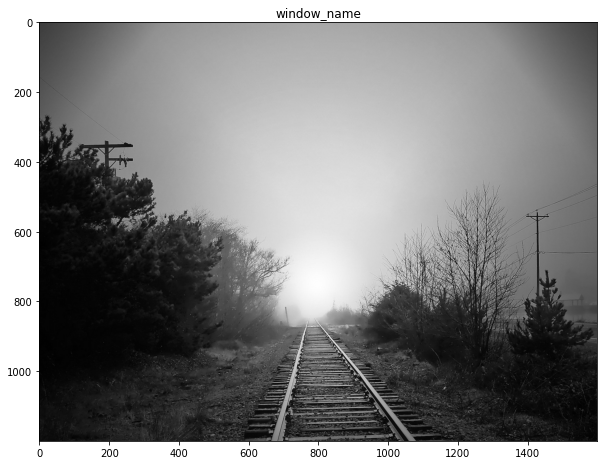

In [15]:
show_picture_plot(img)

# show_picture(img)

In [28]:
print(img.shape)
img = img[:,:,2]
print(img.shape)

(900, 1601, 3)
(900, 1601)


In [29]:
img = img/255.

In [7]:
def gamma_transform_image(image, C: float, gamma: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        new_image = C * (image ** gamma)
        # print(new_image[:10])

        result = np.array(new_image)
        # result = np.array(new_image)
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

In [8]:
def log_transform_image(image, C: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        print(C)
        temp = np.log(image+(1/255.))
        print(temp[:2])
        new_image = C * temp
        print(new_image[:2])
        # print(new_image[:10])

        # result = np.array((new_image))
        result = np.array(gray_image(new_image))
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

In [20]:
def transform_image_size(image, size:float=1):
    # try:
        new_image = []
        if len(img.shape)==2:
            start_time = time.time()
            # print('orig shape', image.shape)
            image=np.array(image)
            x_len, y_len = img.shape[0], img.shape[1]

            x_len_n = x_len*size
            y_len_n = y_len*size

            dt = 1/size
            indexes_x = np.array(np.arange(0,x_len_n)*dt).astype('int')
            indexes_y = np.array(np.arange(0,y_len_n)*dt).astype('int')
            new_image = image[indexes_x,:]
            new_image = new_image[:,indexes_y]
            # for i in range(int(x_len_n)):
            #     new_row = []
            #     for e in range(int(y_len_n)):
            #         # print()
            #         new_row.append(image[int(dt*i), int(dt*e)])
            #     new_image.append(new_row)

            result = np.array(new_image)
            # print('time', time.time()-start_time)
            # print('orig shape', result.shape)
            return result

In [32]:
result = gamma_transform_image(img, 0.8, 1.5)
show_picture(result)

here
[[0.23921569 0.23921569 0.23921569 ... 0.25882353 0.25490196 0.25490196]
 [0.23921569 0.23921569 0.23921569 ... 0.25490196 0.25490196 0.25490196]
 [0.23921569 0.23921569 0.23921569 ... 0.2627451  0.2627451  0.25882353]
 ...
 [0.23921569 0.23921569 0.23921569 ... 0.25882353 0.25882353 0.2627451 ]
 [0.23921569 0.23921569 0.24313725 ... 0.26666667 0.2627451  0.25882353]
 [0.23921569 0.23921569 0.24313725 ... 0.26666667 0.2627451  0.25882353]]
[[0.0935997  0.0935997  0.0935997  ... 0.10534056 0.10295555 0.10295555]
 [0.0935997  0.0935997  0.0935997  ... 0.10295555 0.10295555 0.10295555]
 [0.0935997  0.0935997  0.0935997  ... 0.10774371 0.10774371 0.10534056]
 ...
 [0.0935997  0.0935997  0.0935997  ... 0.10534056 0.10534056 0.10774371]
 [0.0935997  0.0935997  0.09591074 ... 0.11016486 0.10774371 0.10534056]
 [0.0935997  0.0935997  0.09591074 ... 0.11016486 0.10774371 0.10534056]]


In [31]:
dep = 10.
C_max = 10
gamma_max = 3
scale_max = 1.5
title_window = 'gamma image'

C_current = 1.
gamma_current = 1.

def on_trackbar_C(val):
    val/=dep
    C_current = val
    res = gamma_transform_image(img,C_current,gamma_current)
    show_picture_not_close(res, title_window)

def on_trackbar_gamma(val):
    val/=dep
    gamma_current = val
    res = gamma_transform_image(img,C_current,gamma_current)
    show_picture_not_close(res, title_window)

cv.namedWindow(title_window)
# cv.namedWindow('g')
trackbar_name_C = 'C %d' % C_max
trackbar_name_gamma = 'gamma %d' % gamma_max
cv.createTrackbar(trackbar_name_C, title_window , int(C_current*dep), int(C_max*dep), on_trackbar_C)
cv.createTrackbar(trackbar_name_gamma, title_window, int(gamma_current*dep), int(gamma_max*dep), on_trackbar_gamma)

cv.waitKey(0)
cv.destroyAllWindows()
# on_trackbar_C(int(1.*dep))

In [37]:
dep = 100.
C_max = 10
title_window = 'log image'

C_current = 1.
def on_trackbar_C(val):
    val/=dep
    C_current = val
    res = log_transform_image(img,C_current)
    show_picture(res, title_window)

cv.namedWindow(title_window)
trackbar_name_C = 'C %d' % C_max
cv.createTrackbar(trackbar_name_C, title_window , int(0.01*dep), int(C_max*dep), on_trackbar_C)
# Show some stuff
on_trackbar_C(int(1.*dep))

In [49]:
print(img[:2])
result = log_transform_image(img, 20.8)
print(result[:2])
show_picture(result)

[[0.23921569 0.23921569 0.23921569 ... 0.25882353 0.25490196 0.25490196]
 [0.23921569 0.23921569 0.23921569 ... 0.25490196 0.25490196 0.25490196]]
20.8
[[-1.41412916 -1.41412916 -1.41412916 ... -1.33657093 -1.3516088
  -1.3516088 ]
 [-1.41412916 -1.41412916 -1.41412916 ... -1.3516088  -1.3516088
  -1.3516088 ]]
[[-29.41388653 -29.41388653 -29.41388653 ... -27.80067526 -28.11346311
  -28.11346311]
 [-29.41388653 -29.41388653 -29.41388653 ... -28.11346311 -28.11346311
  -28.11346311]]
[[0.74427454 0.74427454 0.74427454 ... 0.75826115 0.75554926 0.75554926]
 [0.74427454 0.74427454 0.74427454 ... 0.75554926 0.75554926 0.75554926]]
